In [2]:
import numpy as np
import seaborn as sns

sns.set(style='darkgrid', palette='viridis')

In [5]:
mass = np.load('../out/mass.npy',allow_pickle='TRUE').item()

In [6]:
mass['cell_mass']

[1170.3970356705986,
 1170.3970188759263,
 1170.4787044845236,
 1170.6383851405003,
 1170.8662635795756,
 1171.1470993549553,
 1171.4724401053616,
 1171.8320589683021,
 1172.2103988440745,
 1172.6128424396486,
 1173.0342116682914,
 1173.4753792367376,
 1173.935223415295,
 1174.4104380688148,
 1174.8992285774793,
 1175.4014230020332,
 1175.9169255304712,
 1176.4456749178287,
 1176.98258977768,
 1177.5276732778705,
 1178.0765439799975,
 1178.6320061558665,
 1179.1943591019958,
 1179.7589666349306,
 1180.3234564711197,
 1180.8901762368082,
 1181.4604006838053,
 1182.033909860859,
 1182.6116020285695,
 1183.1945622511814,
 1183.7812818189068,
 1184.3715763043963,
 1184.960421851323,
 1185.5514942435216,
 1186.1476095940634,
 1186.748204017122,
 1187.3512543239517,
 1187.956479806642,
 1188.5619086462032,
 1189.168227107854,
 1189.7724965377106,
 1190.377328698643,
 1190.983055500439,
 1191.5861347704943,
 1192.1895529285098,
 1192.790625031645,
 1193.3918213670856,
 1193.9905112014244,
 11

<AxesSubplot:>

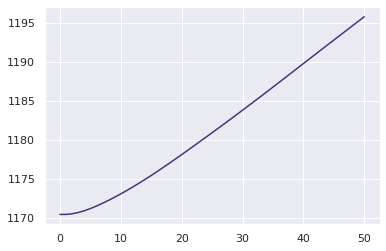

In [7]:
sns.lineplot(x=[i for i in range(len(mass['cell_mass']))],y=mass['cell_mass'])

In [8]:
bulk = np.load('../out/bulk.npy',allow_pickle='TRUE').item()

In [9]:
fba = np.load('../out/fba_results.npy',allow_pickle='TRUE').item()

In [13]:
fba['estimated_fluxes']

{'1-ACYLGLYCEROL-3-P-ACYLTRANSFER-RXN': [-4.4967524545459664e-09,
  2.018898460329318e-06,
  4.895198374842481e-06,
  8.73935323177023e-06,
  1.196458113483481e-05,
  1.388378988061581e-05,
  1.6899459618364285e-05,
  4.594443201148755e-07,
  1.6862136327517924e-05,
  2.00084783193069e-05,
  2.095744350498001e-05,
  2.1786297544774306e-05,
  2.3044427737879792e-05,
  2.388413089440911e-05,
  2.4039227276320337e-05,
  2.4351120554468553e-05,
  2.4821112975272314e-05,
  2.6230056567896774e-05,
  2.7082790562413635e-05,
  2.7844894620543698e-05,
  2.8706042744263027e-05,
  2.9011189212435305e-05,
  3.0105356474019015e-05,
  3.095812938668676e-05,
  3.052541668668494e-05,
  3.045926389878563e-05,
  3.089536677739068e-05,
  3.0541501921365545e-05,
  3.0337677833478373e-05,
  3.080095555737809e-05,
  3.0849702619351246e-05,
  3.3003646769507684e-05,
  3.2359676556408254e-05,
  3.175507195110645e-05,
  3.1743061483468054e-05,
  3.227194546269531e-05,
  3.228947612703887e-05,
  3.3005371031856

In [15]:
fba['target_fluxes']

KeyError: 'target_fluxes'